<a href="https://colab.research.google.com/github/Zafar488/Placement-Predictor/blob/main/end_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/placement-dataset.csv")

In [ ]:
df

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0
...,...,...,...,...
95,Chicago,4.3,200.0,0
96,New York,4.4,42.0,0
97,Los Angeles,6.7,182.0,1
98,Chicago,6.3,103.0,1


In [ ]:
df.shape

(100, 4)

In [ ]:
df.head()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,NaN,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
print("Null values in the DataFrame:")
print(df[['cgpa', 'iq', 'placement']].isnull().sum())


Null values in the DataFrame:
cgpa         8
iq           4
placement    0
dtype: int64


In [ ]:
df = df.dropna(subset=['cgpa'])

In [ ]:
df = df.dropna(subset=['iq'])

In [ ]:
print("Null values in the DataFrame:")
print(df[['cgpa', 'iq', 'placement']].isnull().sum())

Null values in the DataFrame:
cgpa         0
iq           0
placement    0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt


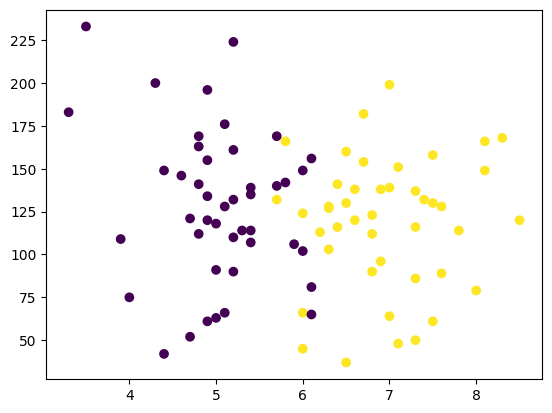

In [ ]:
plt.scatter(df['cgpa'] , df['iq'] ,c = df['placement'])

In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
3,7.4,132.0
4,5.8,142.0
5,7.1,48.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

,placement
0,1
1,0
3,1
4,0
5,1
...,...
95,0
96,0
97,1
98,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X , y , test_size=0.1)

In [ ]:
y_train

,placement
84,0
83,1
17,0
34,0
90,1
...,...
28,0
73,0
45,1
98,1


In [ ]:
x_test

,cgpa,iq
93,6.8,112.0
56,6.1,65.0
85,5.8,166.0
95,4.3,200.0
3,7.4,132.0
57,6.5,130.0
81,5.4,107.0
19,5.2,132.0
54,6.4,141.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar = StandardScaler()

In [ ]:
x_train = scalar.fit_transform(x_train)

In [ ]:
x_train

array([[-2.54835387e-01,  1.11238993e+00],
       [ 1.26138185e+00,  1.79036614e-01],
       [-2.27645837e+00,  1.44743984e+00],
       [-1.01294401e+00,  9.68797112e-01],
       [ 1.09291327e+00, -8.73977382e-01],
       [ 7.55976105e-01, -6.34656019e-01],
       [-1.01294401e+00, -2.51741839e-01],
       [ 8.21017773e-02,  8.01272158e-01],
       [-9.28709714e-01,  1.75855761e+00],
       [-1.09717830e+00, -1.68767002e+00],
       [-1.77105262e+00, -3.23538247e-01],
       [-8.44475424e-01, -1.42441652e+00],
       [-2.54835387e-01,  4.18357977e-01],
       [ 1.68255331e+00, -1.04150234e+00],
       [ 5.87507523e-01,  1.42350770e+00],
       [-8.44475424e-01, -7.54316701e-01],
       [-1.18141259e+00,  5.61950795e-01],
       [-6.76006842e-01,  2.42865743e+00],
       [ 1.93525618e+00,  1.08845779e+00],
       [-1.70601096e-01,  4.66222250e-01],
       [ 1.09291327e+00,  3.46561568e-01],
       [-9.28709714e-01,  7.77340022e-01],
       [-1.68681833e+00, -1.13723088e+00],
       [-2.

In [ ]:
x_test = scalar.transform(x_test)

In [ ]:
x_test

array([[ 0.67174181, -0.25174184],
       [ 0.08210178, -1.37655224],
       [-0.1706011 ,  1.04059352],
       [-1.43411546,  1.85428615],
       [ 1.17714756,  0.22690089],
       [ 0.41903894,  0.17903661],
       [-0.50753826, -0.37140252],
       [-0.67600684,  0.22690089],
       [ 0.33480465,  0.44229011]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
cf = LogisticRegression()

In [ ]:
cf.fit(x_train , y_train)

LogisticRegression()

In [ ]:
y_pred=cf.predict(x_test)

In [ ]:
y_test

,placement
93,1
56,0
85,1
95,0
3,1
57,1
81,0
19,0
54,1


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test , y_pred)

0.7777777777777778

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

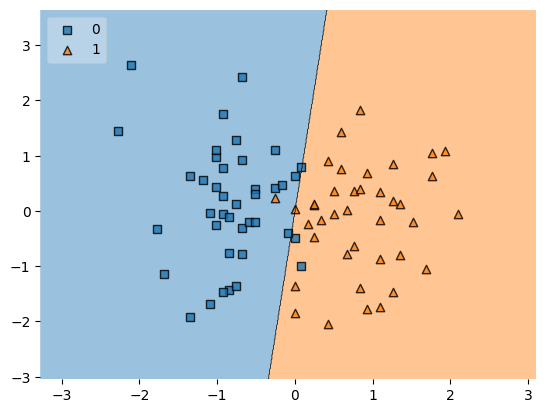

In [ ]:
plot_decision_regions(x_train, y_train.values, clf=cf, legend=2)

# Optional: Add labels and title to the plot

In [ ]:
import pickle

In [ ]:
pickle.dump(cf , open('model.pkl' , 'wb'))

In [ ]:
import pickle
pickle.dump(scalar, open('scaler.pkl', 'wb'))


In [ ]:
from google.colab import files

# Download model.pkl
files.download('model.pkl')

# Download scaler.pkl
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install streamlit


In [ ]:
import streamlit as st
import pickle
import numpy as np

# Load model and scaler
model = pickle.load(open('model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

# Streamlit app
st.title('Placement Prediction App')
st.write("Predict whether a student will be placed based on CGPA and IQ")

# Input fields
cgpa = st.number_input('Enter CGPA:', min_value=0.0, max_value=10.0, value=7.0, step=0.1)
iq = st.number_input('Enter IQ:', min_value=50, max_value=200, value=100, step=1)

# Predict button
if st.button('Predict'):
    # Preprocess input
    input_data = np.array([[cgpa, iq]])
    input_scaled = scaler.transform(input_data)

    # Make prediction
    prediction = model.predict(input_scaled)

    # Display result
    if prediction[0] == 1:
        st.success('The student is likely to be placed! 🎓✅')
    else:
        st.error('The student is unlikely to be placed. ❌')


2025-06-06 11:28:18.181 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-06 11:28:18.182 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-06 11:28:18.183 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-06 11:28:18.184 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-06 11:28:18.186 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-06 11:28:18.188 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-06 11:28:18.188 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-06 11:28:18.190 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
app_code = '''
import streamlit as st
import pickle
import numpy as np

# Load model and scaler
model = pickle.load(open('model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

# Streamlit app
st.title('Placement Prediction App')
st.write("Predict whether a student will be placed based on CGPA and IQ")

# Input fields
cgpa = st.number_input('Enter CGPA:', min_value=0.0, max_value=10.0, value=7.0, step=0.1)
iq = st.number_input('Enter IQ:', min_value=50, max_value=200, value=100, step=1)

# Predict button
if st.button('Predict'):
    # Preprocess input
    input_data = np.array([[cgpa, iq]])
    input_scaled = scaler.transform(input_data)

    # Make prediction
    prediction = model.predict(input_scaled)

    # Display result
    if prediction[0] == 1:
        st.success('The student is likely to be placed! 🎓✅')
    else:
        st.error('The student is unlikely to be placed. ❌')
'''

# Write to file
with open('app.py', 'w') as f:
    f.write(app_code)

# Download link (if you want)
from google.colab import files
files.download('app.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>